importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import the data from a csv file into a pandas dataframe

In [ ]:
song = pd.read_csv('https://raw.githubusercontent.com/nicolerodriguez16/Song-Popularity-Prediction/main/song_data%202.csv')
song

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
song['song_duration_ms'] = (song['song_duration_ms'] / 60000).round(2)
song

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,4.37,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,3.62,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,3.86,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,3.62,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,3.73,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,2.66,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,3.43,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,3.04,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,5.87,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


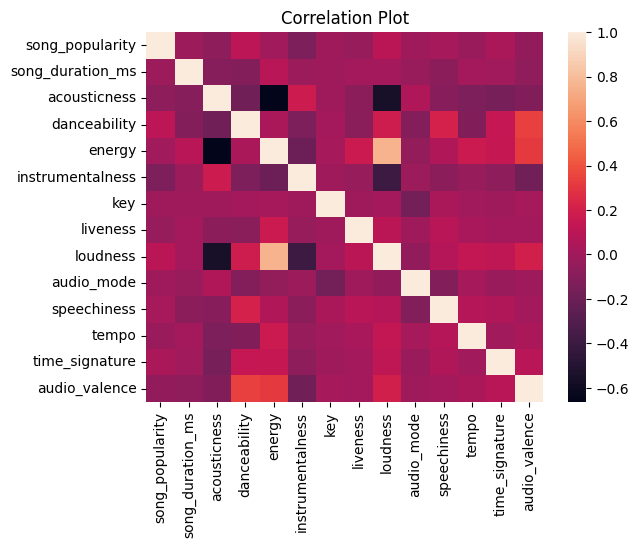

In [ ]:
corr_matrix = song.iloc[:, 1:].corr()#to exclude the name as an attribite bc its a string
sns.heatmap(corr_matrix)
plt.title('Correlation Plot')
plt.show() #Visual 1

In [ ]:
corr_matrix#VIEIWNG WHICH HAS A HIGH CORRELATION

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018945,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018945,1.000000,-0.097818,-0.105014,0.092654,-0.015190,-0.004615,0.016103,0.016405,-0.026362,-0.083439,0.012748,0.000223,-0.063417
acousticness,-0.065181,-0.097818,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.105014,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092654,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015190,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016103,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016405,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026362,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


In [ ]:
song.columns#column features


x = song.drop(['song_name', 'song_popularity', 'song_duration_ms', 'energy', 'key', 'liveness', 'audio_mode', 'speechiness', 'tempo', 'time_signature'], axis = 1)


In [ ]:
song.shape#size of data

(18835, 15)

Data types

In [ ]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 2.2+ MB


do we have any missing data frame?

In [ ]:
song.isnull().sum()#no missing data

,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


Visualize the relationship between loudness and song popularity

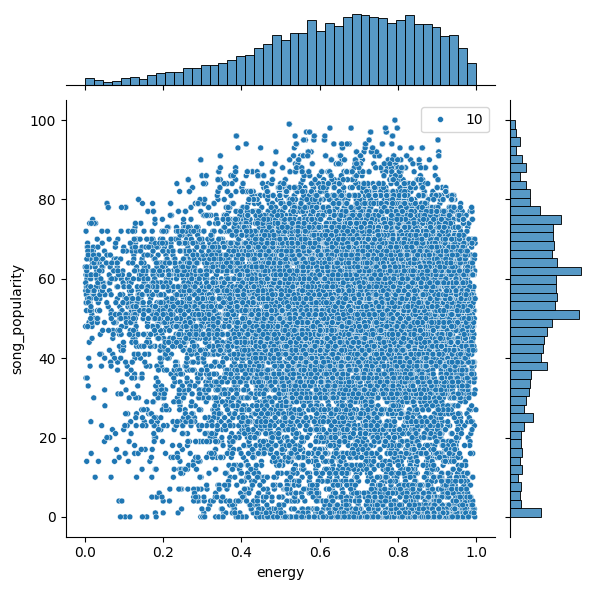

In [ ]:
sns.jointplot(x = 'energy', y = 'song_popularity', data = song, size=10)
plt.show()#visual 3

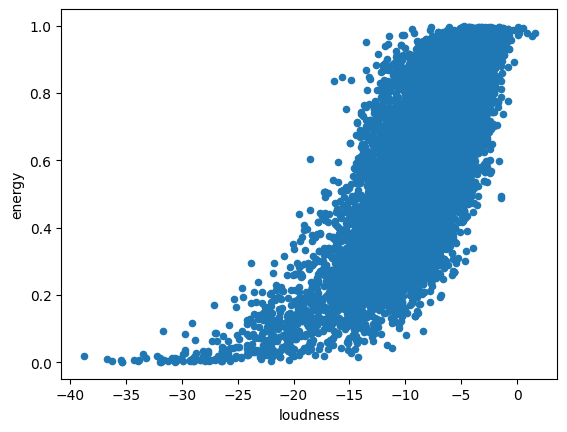

In [ ]:
song.plot(kind='scatter', x = 'loudness', y = 'energy')
plt.show()

Now seperating our data into features (x) and targets (y)

We will not consider song name

In [ ]:
#song_copy = song.copy()

In [ ]:
x = song.drop(['song_name', 'song_popularity', 'song_duration_ms', 'energy', 'key', 'liveness', 'audio_mode', 'speechiness', 'tempo', 'time_signature'], axis = 1)
y = song['song_popularity']

In [ ]:
x

,acousticness,danceability,instrumentalness,loudness,audio_valence
0,0.005520,0.496,0.000029,-4.095,0.474
1,0.010300,0.542,0.000000,-6.407,0.370
2,0.008170,0.737,0.447000,-7.828,0.324
3,0.026400,0.451,0.003550,-4.938,0.198
4,0.000954,0.447,0.000000,-5.065,0.574
...,...,...,...,...,...
18830,0.893000,0.500,0.000065,-16.107,0.300
18831,0.765000,0.495,0.000001,-14.078,0.265
18832,0.847000,0.719,0.000000,-12.222,0.286
18833,0.945000,0.488,0.015700,-12.020,0.323


In [ ]:
x

In [ ]:
y

splitting the dataset into training and testing sets in the ratio 70/30

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 2)

create the model and fit (train) on the training data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Load the linear regression model
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LR
#this is training th emodel, behind the scenes the model is trying to find the relaations ships between x traina nd y train and is
#trying to plot the ideal linear regression plot aka line of best fit

LinearRegression()

Make predictions on the test data

In [ ]:
#after its been train we move on to...
#model evaluation
# test our model on our test data
#the x test is data the model has not seen before the data will be store in y pred
y_pred = LR.predict(x_test)

calculating the Coefficents

In [ ]:
coefficents = LR.coef_
print(f'Coefficients: {coefficents}')

Coefficients: [ -0.19491763  16.19461378 -11.11027187   0.31230518 -11.1744873 ]


Calculate the intercept

In [ ]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 51.98858270496251


Calculating the R-squared

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.04234989190833427


Calculate the mean squared error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 467.50453673815764


Calculating the RMSE

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'RMSE: {rmse}')#the predictions r off by 1.77----

RMSE: 21.621853221640315


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


calculating the mean absolute
 error (mae)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 17.224972535674706


In [ ]:
y_pred # u can see all the predictions the model made based on the test data

array([56.33128673, 54.81895234, 54.20966597, ..., 48.13036285,
       54.85242446, 55.8658432 ])

Export the model as a pickle lol

In [ ]:
import pickle

with open('song_popularity_prediction_model.pk1', 'wb') as f:
  pickle.dump(LR, f)